**Names:** David Andrejsin,Sakchham Sangroula, Milan Bista, Unique Karanjit

**Course:** Advanced Big Data and Data Mining (MSCS-634-M40)  

**Assignment:** Residency Weekend Project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Load the Dataset ---
# URL of the CSV file for the Titanic dataset
url = 'https://docs.google.com/spreadsheets/d/1EyDNza8HgfmrPMtXYNnhTgaQ_iMkeHPD/export?format=csv'

# Load the dataset using Pandas
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully.")
    print("Initial shape of the dataset:", df.shape)
except Exception as e:
    print(f"Failed to load dataset. Error: {e}")
    exit()

Dataset loaded successfully.
Initial shape of the dataset: (1309, 14)


In [ ]:
# --- 2. Inspect the Structure ---
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

# --- 3. Perform Data Cleaning ---

# Handle missing values
# Impute 'age' with the median
age_median = df['age'].median()
df['age'].fillna(age_median, inplace=True)
print(f"\nMissing 'age' values imputed with median: {age_median}")

# Drop the 'cabin' column due to too many missing values
df.drop(columns=['cabin'], inplace=True)
print("Dropped 'cabin' column.")

# Fill 'embarked' with the mode (most frequent value)
embarked_mode = df['embarked'].mode()[0]
df['embarked'].fillna(embarked_mode, inplace=True)
print(f"Missing 'embarked' values filled with mode: {embarked_mode}")



First 5 rows of the dataset:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.de

In [ ]:
# Check for duplicates (none are expected in this dataset)
duplicates = df.duplicated().sum()
if duplicates == 0:
    print("No duplicate rows found.")
else:
    df.drop_duplicates(inplace=True)
    print(f"Removed {duplicates} duplicate rows.")

print("\nData cleaning complete. Final shape:", df.shape)

No duplicate rows found.

Data cleaning complete. Final shape: (1309, 13)


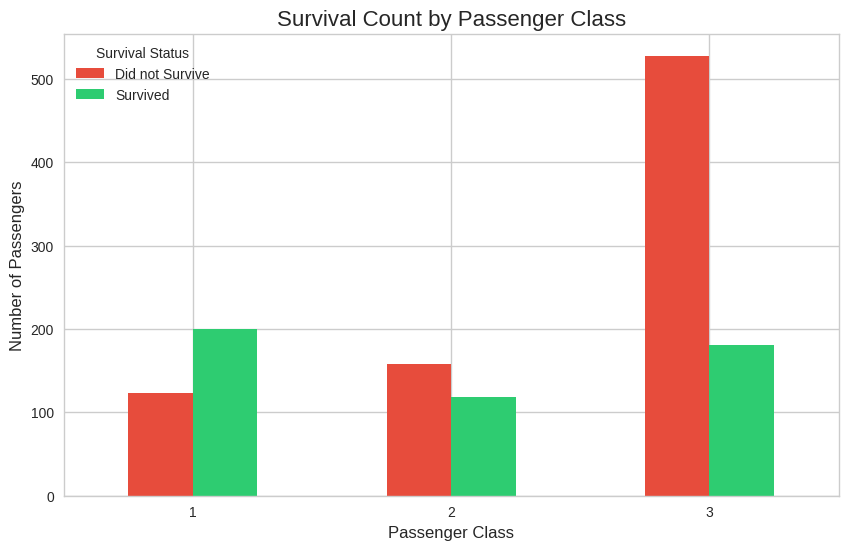

In [ ]:

# --- 4. Conduct Exploratory Data Analysis (EDA) ---

# Set a style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# Visualization 1: Survival Rate by Passenger Class (pclass)
# Create a contingency table of survival counts by class
survival_by_class = df.groupby('pclass')['survived'].value_counts().unstack().fillna(0)
survival_by_class = survival_by_class.rename(columns={0: 'Did not Survive', 1: 'Survived'})

# Plotting the grouped bar chart
ax1 = survival_by_class.plot(kind='bar',
                            figsize=(10, 6),
                            color=['#e74c3c', '#2ecc71'],
                            rot=0)

plt.title('Survival Count by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survival Status')
plt.show()



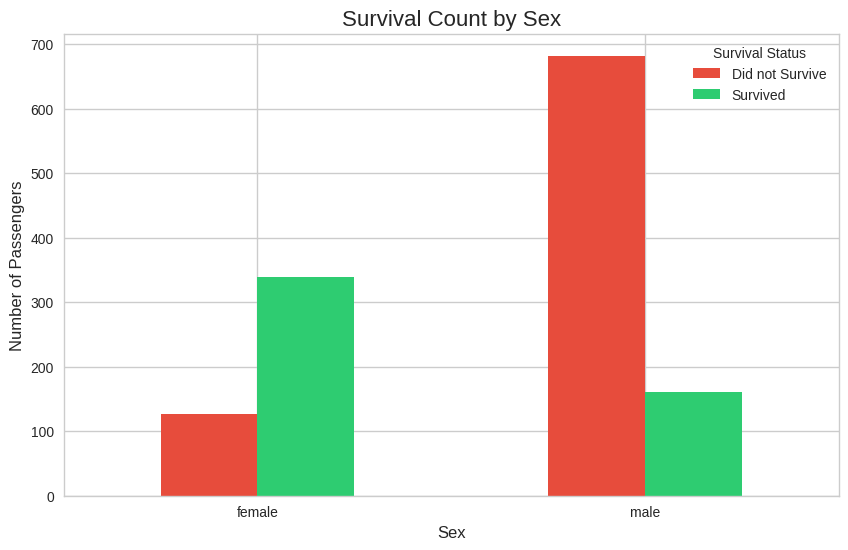


EDA complete. Insights are derived from the visualizations.
Key insights show that passenger class and sex were strong factors in survival.


In [ ]:
# Visualization 2: Survival Rate by Sex
# Create a contingency table of survival counts by sex
survival_by_sex = df.groupby('sex')['survived'].value_counts().unstack().fillna(0)
survival_by_sex = survival_by_sex.rename(columns={0: 'Did not Survive', 1: 'Survived'})

# Plotting the grouped bar chart
ax2 = survival_by_sex.plot(kind='bar',
                           figsize=(10, 6),
                           color=['#e74c3c', '#2ecc71'],
                           rot=0)

plt.title('Survival Count by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survival Status')
plt.show()


# --- 5. Provide Insights ---
print("\nEDA complete. Insights are derived from the visualizations.")
print("Key insights show that passenger class and sex were strong factors in survival.")